In [82]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [83]:
sales_data = pd.read_csv("advertising.csv")

In [84]:
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [85]:
sales_data.shape

(200, 4)

In [86]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [87]:
sales_data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [88]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='TV', ylabel='Count'>

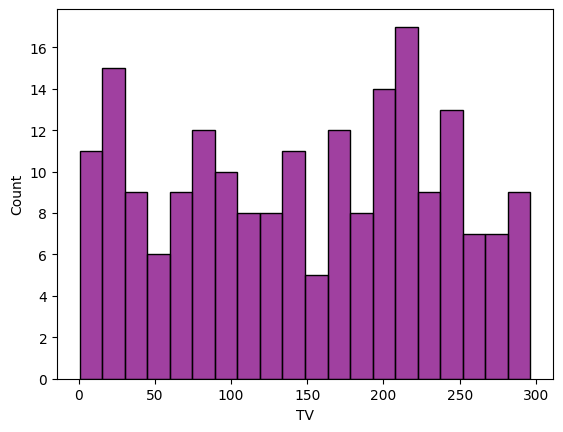

In [89]:
sns.histplot(sales_data['TV'], bins=20,kde=False, color='purple')

<Axes: xlabel='Radio', ylabel='Count'>

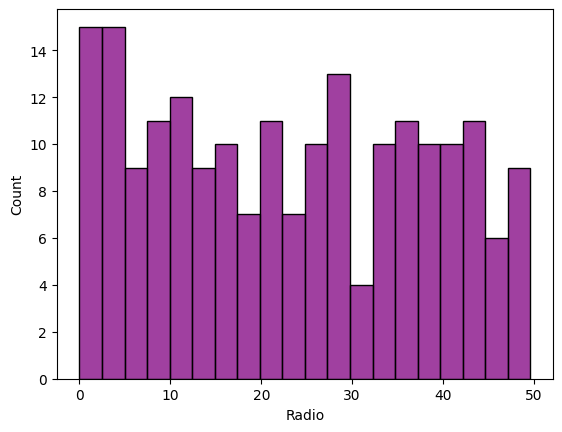

In [90]:
sns.histplot(sales_data['Radio'], bins=20,kde=False, color='purple')

<Axes: xlabel='Newspaper', ylabel='Count'>

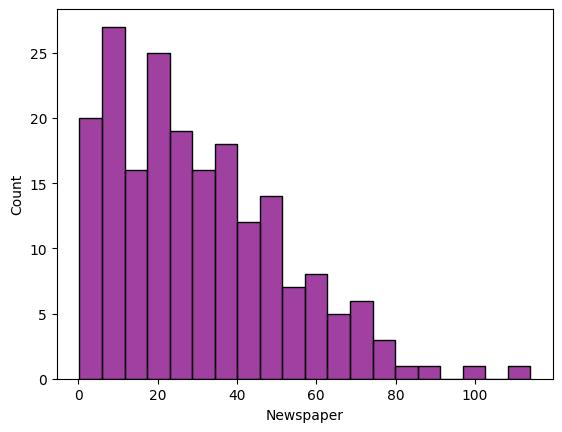

In [91]:
sns.histplot(sales_data['Newspaper'], bins=20,kde=False, color='purple')

<Axes: xlabel='Sales', ylabel='Count'>

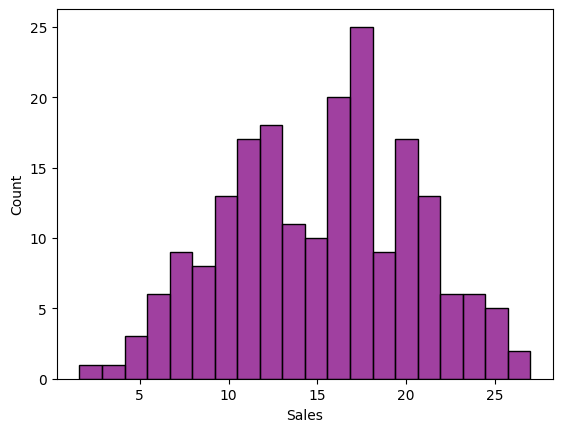

In [92]:
sns.histplot(sales_data['Sales'], bins=20,kde=False, color='purple')

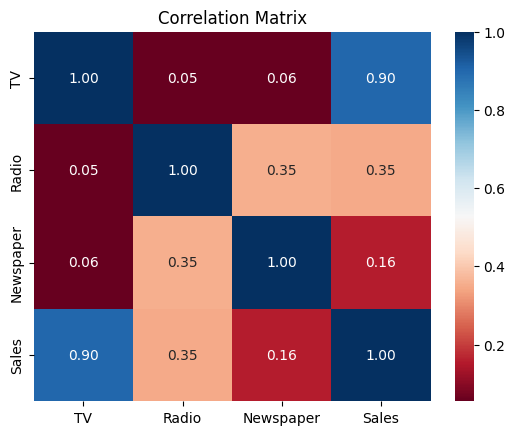

In [93]:
sns.heatmap(sales_data.corr(), annot=True, cmap='RdBu', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [94]:
X = sales_data.drop(['Sales'], axis=1)
y = sales_data['Sales']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [97]:
y_pred = model.predict(X_test)

In [98]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.9179999999999993
Mean Squared Error: 1.4374328500000009
R-squared: 0.9534827934927883


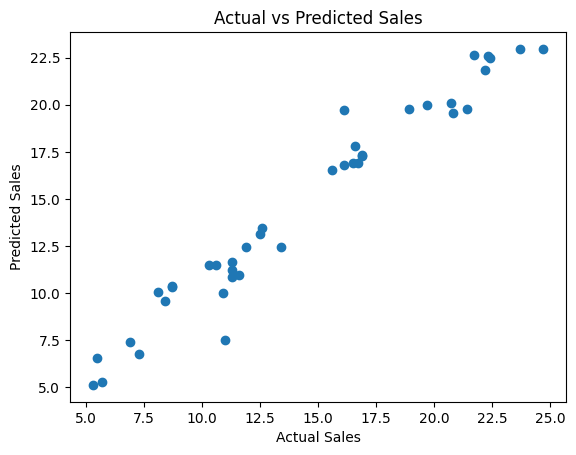

In [99]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()